In [15]:
'''import tarfile

with tarfile.open('fishRecognition_GT.tar', 'r') as tar:
    tar.extractall('fish')'''


In [2]:
import numpy as np
np.object = object   
np.int = int  
np.float = float    
np.bool = bool    

In [3]:
import tensorflow as tf 

In [4]:
from tensorflow import keras


In [5]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [73]:
'!pip install split-folders'
import splitfolders
import os
path = "fishaugmentation_fish4knowledge"
print(os.listdir(path))

['fish01', 'fish02', 'fish03', 'fish04', 'fish05', 'fish06', 'fish07', 'fish08', 'fish09', 'fish10', 'fish11', 'fish12', 'fish13', 'fish14', 'fish15', 'fish16', 'fish17', 'fish18', 'fish19', 'fish20', 'fish21', 'fish22', 'fish23']


In [74]:

splitfolders.ratio(path,seed=1337,output='fish4knowledge_augmented_output', ratio=(0.8, 0, 0.2))


In [75]:
from tensorflow.keras.layers import Dense,Flatten

In [76]:
from tensorflow.keras.applications.vgg16 import VGG16

In [77]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3)
)

In [78]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [79]:
from tensorflow.keras.models import Sequential


In [80]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(23,activation='softmax'))

In [81]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 8, 8, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               8388864   
_________________________________________________________________
dense_3 (Dense)              (None, 23)                5911      
Total params: 23,109,463
Trainable params: 23,109,463
Non-trainable params: 0
_________________________________________________________________


In [82]:
conv_base.trainable = False

In [10]:
import tensorflow as tf

batch_size = 16

# Train dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    'fish_01',
    image_size=(256, 256),
    batch_size=batch_size,
    shuffle=True,
    #label_mode='categorical'
)

# Validation dataset
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    'mask_01',
    image_size=(256, 256),
    batch_size=batch_size,
    shuffle=False,
    #label_mode='categorical'
)


Found 12071 files belonging to 1 classes.
Found 12112 files belonging to 1 classes.


In [84]:
'''for images, labels in train_dataset:
    predictions = model(images)
    print(predictions.shape)  # Check the shape of predictions
    print(labels.shape)       # Check the shape of labels
    break  # Break after one batch for quick inspection'''

'for images, labels in train_dataset:\n    predictions = model(images)\n    print(predictions.shape)  # Check the shape of predictions\n    print(labels.shape)       # Check the shape of labels\n    break  # Break after one batch for quick inspection'

In [85]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [87]:
history = model.fit(train_dataset,steps_per_epoch=32,epochs=100,validation_data=validation_dataset,validation_steps=32)

Epoch 1/100
32/32 [==============================] - 7s 223ms/step - loss: 1.0585 - accuracy: 0.7031 - val_loss: 1.1591 - val_accuracy: 0.6895
Epoch 2/100
32/32 [==============================] - 7s 225ms/step - loss: 1.5044 - accuracy: 0.6152 - val_loss: 1.9082 - val_accuracy: 0.4922
Epoch 3/100
32/32 [==============================] - 7s 224ms/step - loss: 1.6465 - accuracy: 0.5840 - val_loss: 2.0800 - val_accuracy: 0.2246
Epoch 4/100
32/32 [==============================] - 7s 226ms/step - loss: 1.4476 - accuracy: 0.5820 - val_loss: 1.1667 - val_accuracy: 0.5996
Epoch 5/100
32/32 [==============================] - 7s 225ms/step - loss: 1.4481 - accuracy: 0.6387 - val_loss: 1.5014 - val_accuracy: 0.4512
Epoch 6/100
32/32 [==============================] - 7s 226ms/step - loss: 1.5075 - accuracy: 0.6035 - val_loss: 0.7111 - val_accuracy: 0.8340
Epoch 7/100
32/32 [==============================] - 7s 225ms/step - loss: 1.2575 - accuracy: 0.6387 - val_loss: 1.3168 - val_accuracy: 0.4727

In [37]:

'!pip install opencv-python'



   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.6 MB 516.7 kB/s eta 0:01:15
   ---------------------------------------- 0.1/38.6 MB 516.7 kB/s eta 0:01:15
   ---------------------------------------- 0.2/38.6 MB 459.5 kB/s eta 0:01:24
   ---------------------------------------- 0.2/38.6 MB 626.9 kB/s eta 0:01:02
   ---------------------------------------- 0.3/38.6 MB 708.9 kB/s eta 0:00:55
   ---------------------------------------- 0.4/38.6 MB 913.9 kB/s eta 0:00:42
    --------------------------------------- 0.5/38.6 MB 1.0 MB/s eta 0:00:37
    --------------------------------------- 0.6/38.6 MB 1.2 MB/s eta 0:00:33
    ------------------

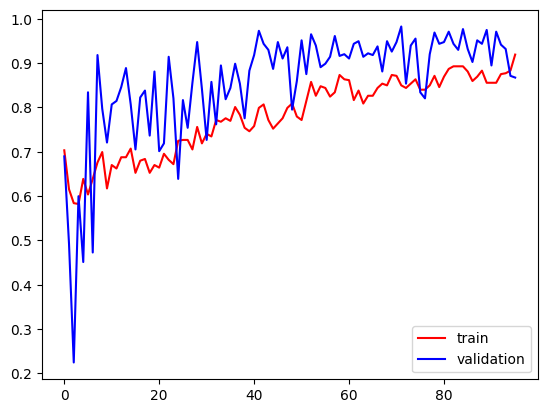

In [255]:
 import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

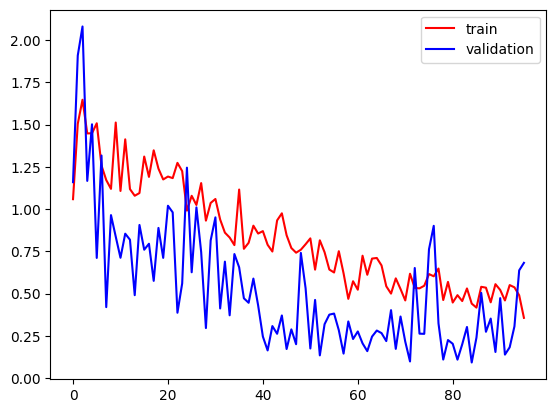

In [256]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [110]:
import cv2

In [247]:
test_img = cv2.imread('fish1new2.png')
import matplotlib.pyplot as plt

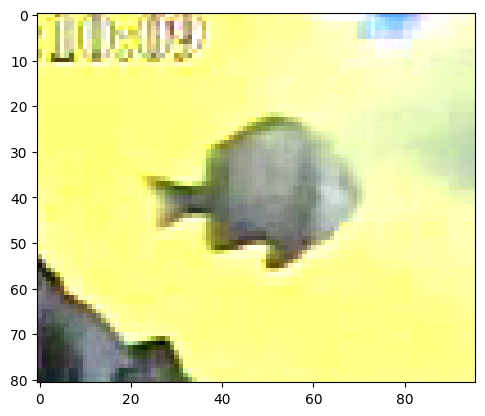

In [248]:
plt.imshow(test_img)

In [249]:
test_img.shape

(81, 96, 3)

In [250]:
test_img = cv2.resize(test_img,(256,256))

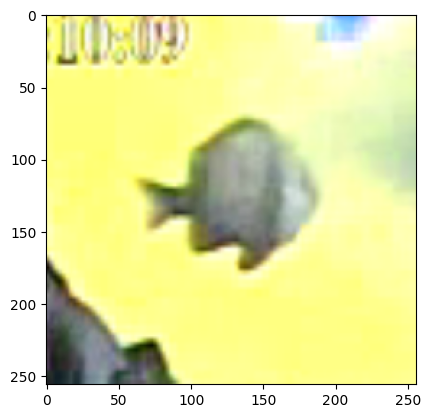

In [251]:
plt.imshow(test_img)

In [252]:
test_input = test_img.reshape((1,256,256,3))

In [253]:
model.predict(test_input)

array([[3.8690410e-05, 2.5413652e-05, 1.2870567e-12, 7.7979234e-10,
        6.9810253e-16, 3.1793597e-08, 1.4981103e-11, 1.1345027e-05,
        9.9992085e-01, 1.3557931e-16, 8.4317030e-08, 2.7591389e-07,
        1.0626297e-14, 2.0969458e-14, 3.2097739e-06, 1.3314608e-19,
        8.0815923e-08, 3.5765350e-18, 3.7836779e-16, 1.5677166e-15,
        4.7511669e-12, 1.1731614e-17, 8.0728022e-25]], dtype=float32)

In [254]:
np.argmax(model.predict(test_input),axis=1)

array([8], dtype=int64)

In [29]:
'''import cv2
import os

def find_max_image_shape(directory):
    max_width, max_height = 0, 0

    # Iterate through all files in the directory
    for filename in os.listdir(directory):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.gif')):
            # Construct the full file path
            filepath = os.path.join(directory, filename)

            # Read the image
            img = cv2.imread(filepath)

            # Get the shape of the image
            height, width, _ = img.shape

            # Update max width and height if needed
            max_width = max(max_width, width)
            max_height = max(max_height, height)

    return max_width, max_height

# Provide the path to your dataset directory
dataset_directory = "fish project/fish/fish_image/fish_01"

# Call the function to find the maximum image shape
max_width, max_height = find_max_image_shape(dataset_directory)

print("Maximum Image Width:", max_width)
print("Maximum Image Height:", max_height)
'''

Maximum Image Width: 276
Maximum Image Height: 264


In [38]:
# size - padding 
# data augmnetation 
# fine tunning 
# multi layer API 

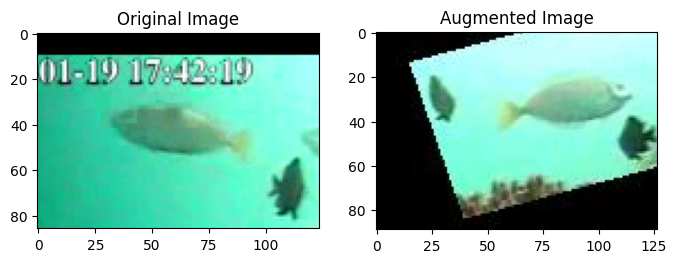

In [70]:
'''import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Set up the directories
input_dir = 'fish/fish_image/fish_23'
output_dir = 'fishaugmentation_fish4knowledge/fish23'

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,# Normalize pixel values to the range [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='constant'
)

# Load each image in the input directory and generate augmented images
for filename in os.listdir(input_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(input_dir, filename)
        img = image.load_img(img_path)
        x = image.img_to_array(img)
        x = x.reshape((1,) + x.shape)

        # Generate augmented images and save to the output directory
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='aug', save_format='jpeg'):
            i += 1
            if i >= 120:  # Generate 5 augmented images for each original image
                break

# Display one original and augmented image for verification
original_img = image.load_img(os.path.join(input_dir, os.listdir(input_dir)[0]))
augmented_img = image.load_img(os.path.join(output_dir, os.listdir(output_dir)[0]))

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(original_img)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(augmented_img)
plt.title('Augmented Image')

plt.show()'''

In [71]:
'''import os

augmented_folder = 'fishaugmentation_fish4knowledge/fish23'  # Replace with your folder path

image_count = 0
for root, _, files in os.walk(augmented_folder):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):  # Adjust for other image extensions if needed
            image_count += 1

print("Number of images in the augmented folder:", image_count)'''

Number of images in the augmented folder: 2586
